Initial data:
   author_popularity  book_length  num_keywords    genre
0          41.052297          776             5  mystery
1          48.950098          674             5  mystery
2           2.323401          633            19  fantasy
3          41.564184          169            12  mystery
4          65.129649          992            18  fantasy

Classification Report:
               precision    recall  f1-score   support

     fantasy       0.25      0.50      0.33         4
     fiction       1.00      1.00      1.00         1
     mystery       0.62      0.50      0.56        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.50        20
   macro avg       0.64      0.60      0.60        20
weighted avg       0.58      0.50      0.52        20

Accuracy: 0.50
Precision: 0.58
Recall: 0.50


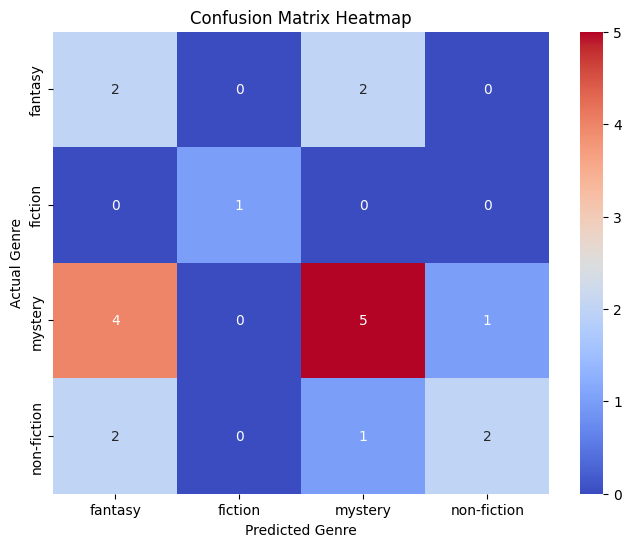

In [3]:
# 1. Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# 2. Load dataset
df = pd.read_csv('book_genres.csv')
print("Initial data:")
print(df.head())

# 3. Handle missing values (if any)
df.dropna(inplace=True)

# 4. Separate features and target
X = df.drop('genre', axis=1)  # Assuming 'Genre' is the target column
y = df['genre']

# 5. Encode categorical variables (if any)
X = pd.get_dummies(X)

# 6. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Make predictions
y_pred = model.predict(X_test)

# 9. Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# 10. Display results
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# 11. Heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.show()
